In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
%matplotlib inline

In [3]:
def inicializaRede(tamanho, nCiclos):
    """Função para inicializar a rede de simulação da floresta
    Usamos 0 para representar céluas sem vegetação, 1 com vegetação e 2 com fogo
    tamanho: Dimensão de um lado da rede considerando a rede quadrada
    nCiclos: Número de ciclos de cresce-fogo a simular
    return: numpy array em que cada elemento é um estado da rede depois de um ciclo"""

    simul = np.zeros((nCiclos + 1, tamanho, tamanho), dtype="int")
    simul[0] = np.random.randint(
        2, size=(tamanho, tamanho)
    )  # Inicialização do estado inicial
    
    return simul

In [4]:
def cresceArde(florestaOld, floresta, p, f):
    """Função para calcular crescimento e surgimento de fogo dada uma grelha quadrada
    Usamos 0 para representar céluas sem vegetação, 1 com vegetação e 2 com fogo
    floresta: numpy array com a representação da floresta
    p: Probabilidade de a vegetação crescer numa célula sem vegetação
    f: Probabilidade de aparecer fogo numa célula com vegetação
    return: A floresta depois da fase de crescimento e início de fogo"""

    vazias = np.argwhere(florestaOld == 0)  # Obtém os índices das células sem vegetação
    vegetacao = np.argwhere(florestaOld)  # Obtém os índices das células com vegetação

    for ind in vazias:
        floresta[ind[0], ind[1]] = np.floor(1 + p - np.random.random())
    for ind in vegetacao:
        floresta[ind[0], ind[1]] = np.floor(2 + f - np.random.random())

    return floresta

In [5]:
def propaga(floresta):
    """Função que calcula a propagação do fogo
    Usamos 0 para representar céluas sem vegetação, 1 com vegetação e 2 com fogo
    floresta: numpy array com a representação da floresta
    return: floresta depois de terminar propagação de fogo"""

    xMax, yMax = floresta.shape
    # Enquanto se verificar alteração na floresta continua o processo de propagação
    altera = True
    ciclos = 0
    while altera and ciclos < 1000:
        altera = False
        ciclos += 1
        indFogo = np.argwhere(floresta == 2)
        for ind in indFogo:
            i = ind[0]
            j = ind[1]
            if i - 1 >= 0 and floresta[i - 1, j] == 1:
                floresta[i - 1, j] = 2
                altera = True
            if i + 1 < xMax and floresta[i + 1, j] == 1:
                floresta[i + 1, j] = 2
                altera = True
            if j - 1 >= 0 and floresta[i, j - 1] == 1:
                floresta[i, j - 1] = 2
                altera = True
            if j + 1 < yMax and floresta[i, j + 1] == 1:
                floresta[i, j + 1] = 2
                altera = True
    # Transforma as células ardidas em células sem vegetação
    floresta[floresta == 2] = 0

    if ciclos >= 1000:
        print("Não convergiu!")

    return floresta

In [6]:
def florestaViva(tamanho, probCrescer, probArder, nCiclos):
    """Função que simula vários ciclos de crescimento e fogo na floresta
    tamanho: O tamanho da grelha quadrada
    probCrescer: A probabilidade de crescer vegetação onde não existe
    probArder: A probabilidade de se iniciar um fogo em célula com vegetação
    nCiclos: Número de ciclos a simular"""

    # Inicialização da floresta
    simul = inicializaRede(tamanho, nCiclos)

    # Ciclos de cresce arde
    for i in range(1, nCiclos + 1):
        cresceArde(simul[i - 1], simul[i], probCrescer, probArder)
        propaga(simul[i])

    return simul

In [7]:
def anim_rule(simul):
    # %matplotlib notebook
    fig, ax = plt.subplots(figsize=(6, 6))

    im = ax.imshow(simul[0], cmap=plt.get_cmap("Greens"))

    def update(i):

        im.set_array(simul[i])
        return [im]

    anim = animation.FuncAnimation(
        fig,
        update,
        frames=len(simul),
        interval=1000 / 30,  # in ms
    )

    return anim

In [8]:
def denPlot(simul):
    # %matplotlib inline
    size = len(simul)

    veg = np.zeros(size)
    des = np.zeros(size)
    for i in range(size):
        veg[i] = len(np.argwhere(simul[i] > 0))
        des[i] = len(np.argwhere(simul[i] == 0))

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(veg, "g")
    ax.plot(des, "b")

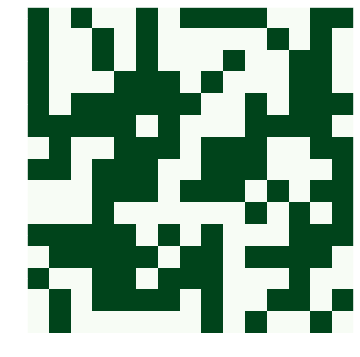

In [9]:
simul = florestaViva(15, 0.07, 0.001, 200)
anim_rule(simul)

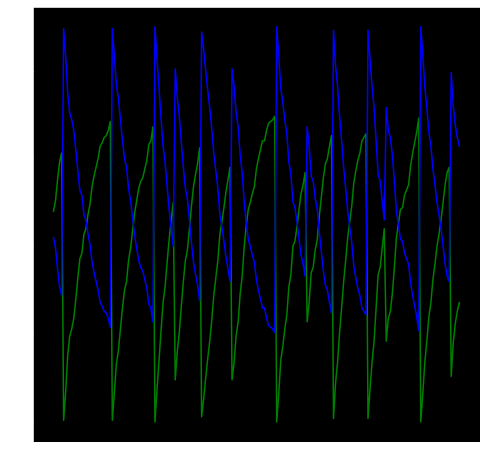

In [10]:
denPlot(simul)